# Homework 2

Q1. Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column),  

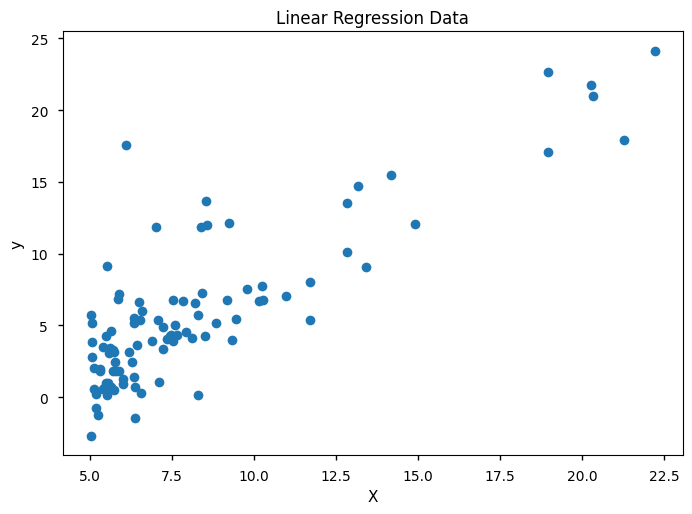

In [67]:
import matplotlib.pyplot as plt
import numpy as np

data = open("data2.txt", "r")

X = []
y = []

for ROWS in data:
    splitRow = ROWS.split(',') # split row in data file by delimeter
  
    X.append(float(splitRow[0])) # push decimal data input parameter to array
    y.append(float(splitRow[1])) # push decimal data output to array
    
plt.plot(X, y, 'o') # plot data
plt.style.use('seaborn-v0_8-notebook')
plt.title('Linear Regression Data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Q.2 Use Python to implement the following methods to find the coefficients: Normal equation.

## Normal Equation

In [68]:
l = len(X) # total number of features
X_b = np.c_[np.ones((l, 1)), X] # add x0 = 1 to each instance to perform vector operations
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # normal equation to find coefficients
print("Theta Found: ", theta_best)

Theta Found:  [-3.89578088  1.19303364]


We can now make predictions with the theta found

In [69]:
X_new = np.array([[l], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best) 

Plot the predictions

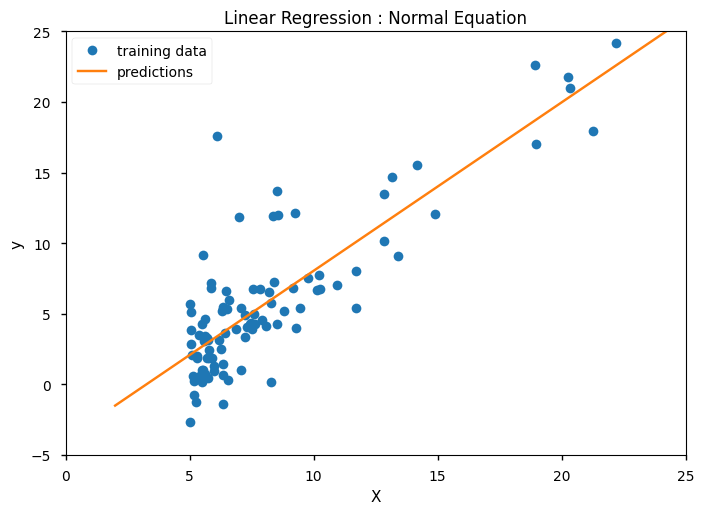

In [70]:
plt.plot(X, y, 'o', label='training data')
plt.plot(X_new, y_predict, "-", label='predictions')
plt.title('Linear Regression : Normal Equation')
plt.xlabel('X')
plt.ylabel('y')
plt.axis([0, 25, -5, 25])
plt.legend()
plt.show()

Q.3 Use Python to implement the following methods to find the coefficients: Gradient Descent using batch AND stochastic modes respectively. 

Part a. Split dataset into 80% for training and 20% for testing.  

In [71]:
from sklearn.model_selection import train_test_split

# using the train test split function, split data train/test 80%/20% and store into corresponding variables
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

Part b. Plot MSE vs. iteration of each mode for both training set and testing set; compare batch 
and stochastic modes in terms of accuracy (of testing set) and speed of convergence. 
(You need to determine an appropriate termination condition, e.g., when cost function 
is less than a threshold, and/or after a given number of iterations.) 

In [72]:
from sklearn.metrics import mean_squared_error
def GDBatch(eta, n_iterations, X, y, X_test, y_test, out):
    m = len(X) # size of input
    m_test = len(X_test)
    
    X_b = np.c_[np.ones((m, 1)), X] # add x0 = 1 to each instance 
    X_b_test = np.c_[np.ones((m_test, 1)), X_test]
    
    # history of mse function values
    mse_history = []
    mse_history_test = []

    theta = np.zeros(X_b.shape[1]) # initialize theta
   
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
        theta = theta - eta * gradients
    
      # Compute and store mse function value
      
        mse =  np.sum(np.square(y - X_b.dot(theta))) / m   # cost
        mse_history.append(mse)
        
        mse_test = np.sum(np.square(y_test - X_b_test.dot(theta))) / m_test   # cost
        mse_history_test.append(mse_test)
        
        if (out == "yes"):
            print("--------------")
            print("iteration: ", iteration)
            print("theta: ", theta)
            print("cost train: ", mse)
            print("cost test: ", mse_test)
   
    return theta, mse_history, mse_history_test


eta = 0.01 # learning rate
n_iterations = 1000

#calcualte theta and mse for Batch Gradient Descent
theta_batch, mse, mse_test = GDBatch(eta, n_iterations, X_train, y_train, X_test, y_test, "yes")
print("theta: ", theta_batch)

--------------
iteration:  0
theta:  [0.10909473 1.17668323]
cost train:  24.60634517724184
cost test:  21.404175132261592
--------------
iteration:  1
theta:  [0.02966612 0.55522073]
cost train:  15.368102315774783
cost test:  21.436110925373452
--------------
iteration:  2
theta:  [0.05024188 0.88689864]
cost train:  12.758074164751616
cost test:  11.21431050856398
--------------
iteration:  3
theta:  [0.01788108 0.71333511]
cost train:  12.010519714948352
cost test:  13.72758198141268
--------------
iteration:  4
theta:  [0.01365329 0.80757868]
cost train:  11.786373979618315
cost test:  11.56180241198471
--------------
iteration:  5
theta:  [-0.0054145   0.75985739]
cost train:  11.709389642488569
cost test:  12.44780867237115
--------------
iteration:  6
theta:  [-0.01654372  0.78738023]
cost train:  11.673849157634319
cost test:  11.882553089157422
--------------
iteration:  7
theta:  [-0.03180891  0.77501064]
cost train:  11.650047667633102
cost test:  12.1305300451663
---------

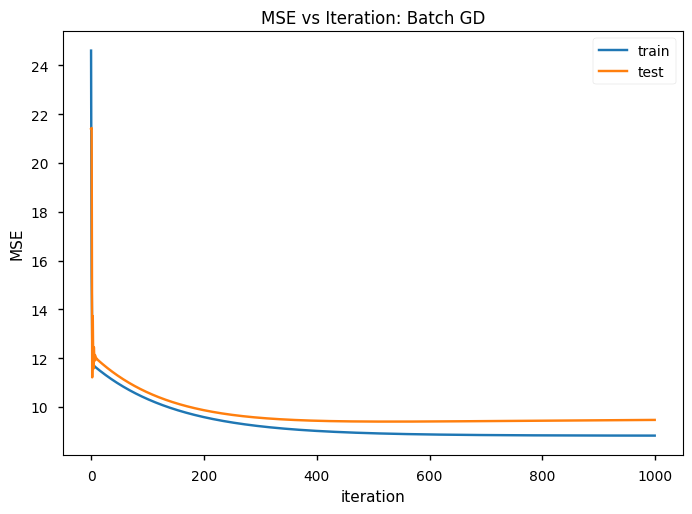

In [73]:
#plot MSE cost findings from GDBatch (Training & Test)
plt.plot(range(len(mse)),mse,'-', label="train")
plt.plot(range(len(mse_test)),mse_test,'-', label="test")
plt.legend()
plt.title('MSE vs Iteration: Batch GD')
plt.xlabel('iteration')
plt.ylabel('MSE')
plt.show()

In [74]:
print("Coefficients found using Batch : ", theta_batch)

#make predictions using theta  
X_new_batch = np.array([[len(X_train)], [2]])
X_new_b_batch = np.c_[np.ones((2, 1)), X_new_batch] # add x0 = 1 to each instance
y_predict_batch = X_new_b_batch.dot(theta_batch)

Coefficients found using Batch :  [-3.95050057  1.19080443]


In [75]:
import numpy as np

def StochasticGD(X, y, X_test, y_test, n_epochs, out):
    
    m = len(X)
    m_test = len(X_test)
    X_b = np.c_[np.ones((m, 1)), X] # add x0 = 1 to each instance 
    X_b_test = np.c_[np.ones((m_test, 1)), X_test] # add x0 = 1 to each instance 
   
    mse_history = []
    mse_history_test = []
    
    rates = []
    theta = np.random.randn(2,1)
   
    t0, t1 = 1, 100 # learning schedule hyperparameters
    
    def learning_schedule(t): 
        return t0/(t+t1)
    

    for epoch in range(n_epochs): 
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch * m + i)
            theta = theta - eta * gradients

            mse =  np.sum(np.square(y - X_b.dot(theta))) / m   # cost
            mse_history.append(mse)
        
            mse_test = np.sum(np.square(y_test - X_b_test.dot(theta))) / m_test   # cost
            mse_history_test.append(mse_test)
            
            if (out == "yes"):
                print("--------------")
                print("iteration: ", i)
                print("theta: ", theta)
                print("cost train: ", mse)
                print("cost test: ", mse_test)
                
            rates.append(eta)
            
    return theta, mse_history, mse_history_test, rates

rate = 0.01
iterations = 100
theta_stochastic, mse, mse_test, rates = StochasticGD(X_train, y_train, X_test, y_test, iterations, "yes")

--------------
iteration:  0
theta:  [[-0.68093171]
 [ 3.97419038]]
cost train:  67326.51923007614
cost test:  23131.20833301096
--------------
iteration:  1
theta:  [[-1.1387608 ]
 [ 0.66948841]]
cost train:  2707.855152052233
cost test:  1027.564366556853
--------------
iteration:  2
theta:  [[-1.11889734]
 [ 0.87356569]]
cost train:  2902.9777995873
cost test:  1051.1807104105003
--------------
iteration:  3
theta:  [[-1.18121386]
 [ 0.55024264]]
cost train:  2833.852320599234
cost test:  1099.2174517458775
--------------
iteration:  4
theta:  [[-1.12963289]
 [ 0.84114384]]
cost train:  2838.7923659773237
cost test:  1035.9561849144425
--------------
iteration:  5
theta:  [[-1.18662265]
 [ 0.4990913 ]]
cost train:  2937.240658081951
cost test:  1147.1048859166372
--------------
iteration:  6
theta:  [[-1.10787219]
 [ 1.09288553]]
cost train:  3661.5081031992167
cost test:  1271.39806427746
--------------
iteration:  7
theta:  [[-1.17927732]
 [ 0.3104995 ]]
cost train:  3570.14451463

In [76]:
print("Coefficients found using Stochastic: ", theta_stochastic)

#make predictions using theta
X_new_stochastic = np.array([[len(X_train)], [2]])
X_new_b_stochastic = np.c_[np.ones((2, 1)), X_new_stochastic] # add x0 = 1 to each instance
y_predict_stochastic = X_new_b_stochastic.dot(theta_stochastic)

Coefficients found using Stochastic:  [[-3.54331231]
 [ 1.12877004]]


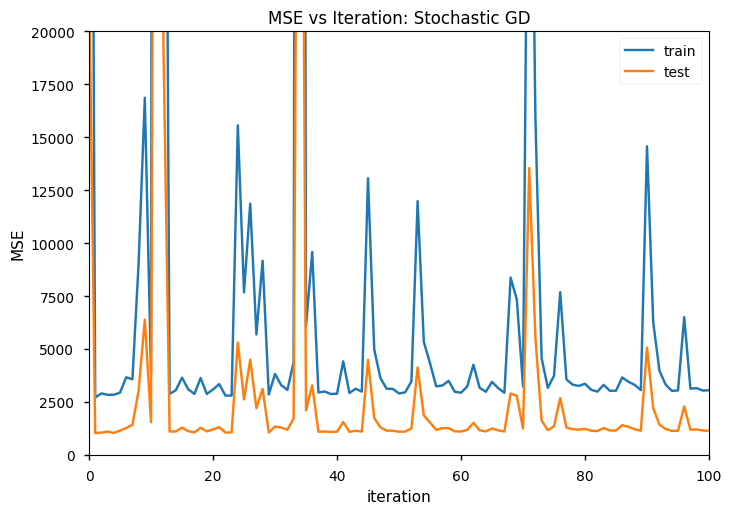

In [77]:
# plot MSE cost from Stochastic Gradient Descent
plt.plot(range(len(mse)),mse,'-', label="train")
plt.plot(range(len(mse_test)),mse_test,'-', label="test")
plt.title('MSE vs Iteration: Stochastic GD')
plt.legend()
plt.axis([0, 100, 0, 20000])
plt.xlabel('iteration')
plt.ylabel('MSE')
plt.show()

Stochastic Gradient Descent (SGD) only took 100 iterations to converge, while batch learning took 1000 iterations. SGD converges faster as it reaches a very low MSE after only a few iterations. Batch learning reaches a low MSE after approximately 300 to 400 iterations. However, batch learning is more stable and is also more accurate. On the other hand, stochastic in nature is more sporadic and not as accurate, as seen in the graph.                                                                                                                                            While the batch learning predicted coefficients are closer to the output that the normal equation yields, it is also overfitting. It is important to note that the MSE for test data is lower than the MSE for train data when using stochastic gradient descent. That means that stochastic gradient descent is doing a better job at estimating values it has not seen before in the training phase. Batch learning seems to be overfitting to the model, and gives slightly better results for the training data than it does not-previously seen test data.

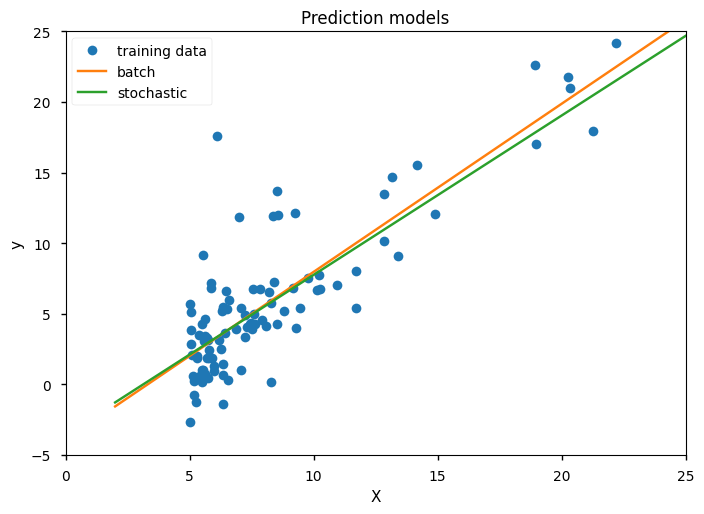

In [78]:
#### plot initial data, and stochastic and batch predictions
plt.plot(X, y, 'o', label='training data')
plt.plot(X_new_batch ,y_predict_batch,'-', label='batch')
plt.plot(X_new_stochastic ,y_predict_stochastic,'-', label='stochastic')
plt.title('Prediction models')
plt.axis([0, 25, -5, 25])
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Part c. Plot MSE vs. learning rate using (modified values) 0.01, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.001 and determine the best learning rate. 

----------------
rate:  0.001
train cost:  10.33655031307334
test cost:  10.608704997802127
----------------
rate:  0.002
train cost:  9.59084159135415
test cost:  9.87407655997119
----------------
rate:  0.003
train cost:  9.212533459794356
test cost:  9.556968278669478
----------------
rate:  0.004
train cost:  9.020656846459405
test cost:  9.4357317818226
----------------
rate:  0.005
train cost:  8.923360113232729
test cost:  9.402466762355132
----------------
rate:  0.006
train cost:  8.874034300288692
test cost:  9.40569871059133
----------------
rate:  0.007
train cost:  8.849033727754845
test cost:  9.421650294183166
----------------
rate:  0.008
train cost:  8.836365224735495
test cost:  9.43992706056217
----------------
rate:  0.009
train cost:  8.829947217273544
test cost:  9.45644505397216
----------------
rate:  0.01
train cost:  8.8266965341135
test cost:  9.46997961397821


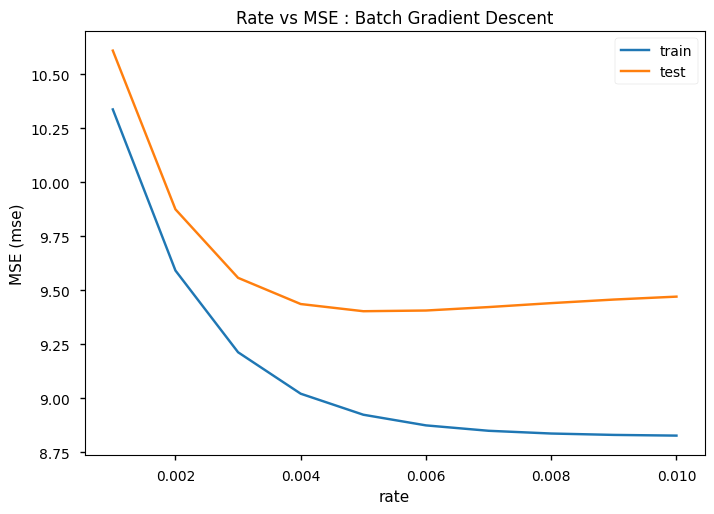

In [79]:
# Import math Library
import warnings
warnings.filterwarnings('ignore')

rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
n_iterations = 1000

mse_list = []
mse_list_test = []

for rate in rates:
    theta, mse_batch_rate, mse_batch_rate_test = GDBatch(rate, n_iterations, X_train, y_train, X_test, y_test, "no")
    mse_list.append(mse_batch_rate[n_iterations-1])
    mse_list_test.append(mse_batch_rate_test[n_iterations-1])
    print("----------------")
    print("rate: " , rate)
    print("train cost: " , mse_batch_rate[n_iterations-1])
    print("test cost: " , mse_batch_rate_test[n_iterations-1])

plt.title("Rate vs MSE : Batch Gradient Descent")
plt.xlabel('rate')
plt.ylabel('MSE (mse)')

plt.plot(rates,mse_list,'-', label="train")
plt.plot(rates,mse_list_test,'-', label="test")
plt.legend()
plt.show()

In [80]:
n_iterations = 100

# capture the rates the stochastic gradient uses in each epoch, store in variable rates_stochastic
theta, mse_stochastic_rate, mse_test_stochastic_rate, rates_stochastic = StochasticGD(X_train, y_train, X_test, y_test, n_iterations, "no")

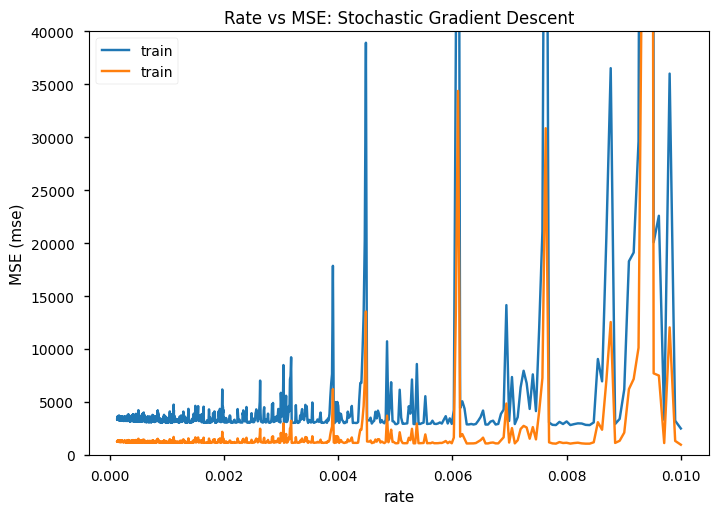

In [87]:
plt.title("Rate vs MSE: Stochastic Gradient Descent")
plt.xlabel('rate')
plt.ylabel('MSE (mse)')
plt.plot(rates_stochastic,mse_stochastic_rate,'-', label="train")
plt.plot(rates_stochastic,mse_test_stochastic_rate,'-', label="train")
plt.ylim([0, 40000])
plt.legend()
plt.show()

The learning rate for this model was "tweaked" by a learning schedule. This was done so that the model did converge and not spiral away from the target coefficients. Based on this graph, the best learning rate is hard to determine because the MSE can greatly vary from one rate to the other. However, rates in the range of 0.001 to 0.004 are best following the graph. As the learning rate increases, there are more instances of MSE reaching higher values for both the training and test data.